In [1]:
import numpy as np
import matplotlib.pyplot as plt
from geometry import H_beam
from mesh import Mesh
from stress_strain_analysis import stress_strain_analysis
from print_plot_functions import *
from model_frame import *

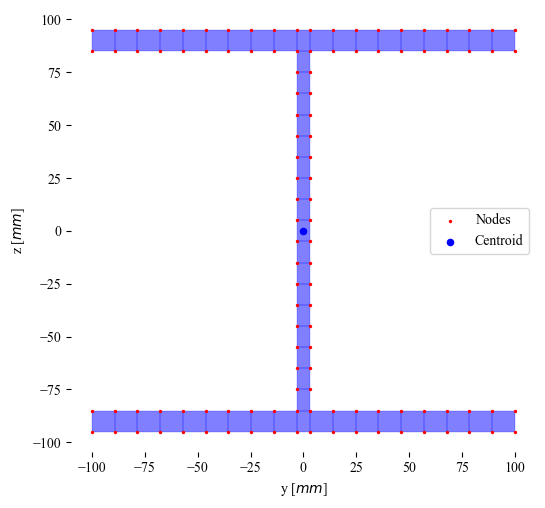

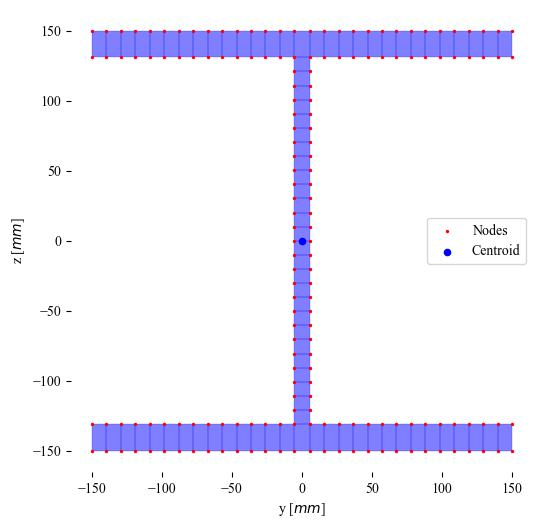

In [2]:
HEA_200 = H_beam(web_width     =   6.5,
                 web_height    = 170.0,
                 flange_width  = 200.0,
                 flange_height =  10.0)
beam = Mesh(HEA_200, mesh_type="quadrilateral", mesh_size=10)
beam.plot()

HEB_300 = H_beam(web_width     =  11.0,
                 web_height    = 262.0,
                 flange_width  = 300.0,
                 flange_height =  19.0)
column = Mesh(HEB_300, mesh_type="quadrilateral", mesh_size=10)
column.plot()


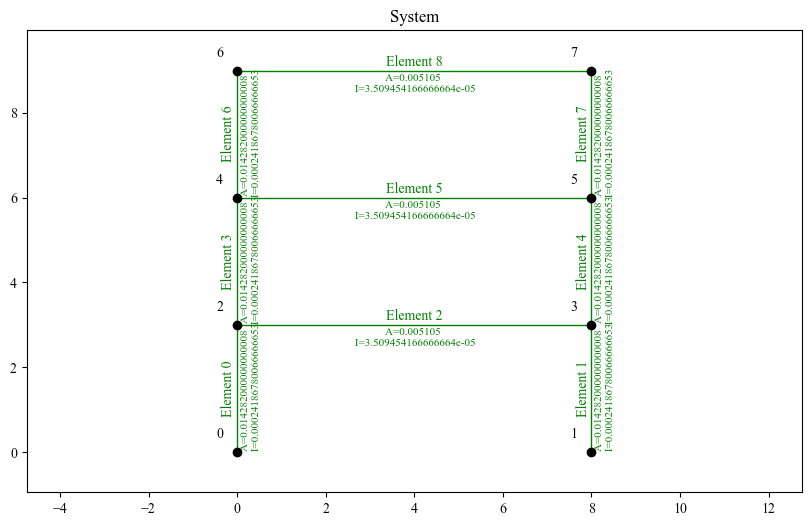

In [3]:
frame = Frame(column = column, beam = beam, number_of_stories=3, story_height=3, story_width=8)

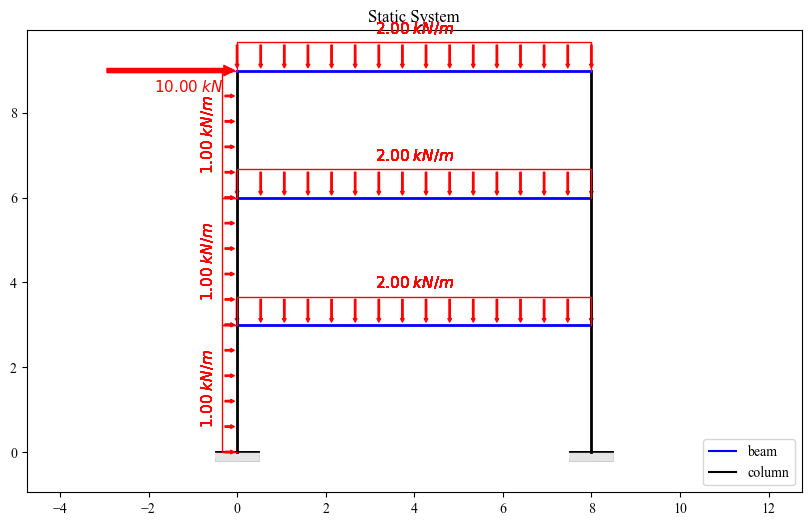

In [4]:
nodal_loads = np.array([
    [6, 10000,   0, 0]
])

distributed_loads = np.array([
    [-1000,-1000],
    [0,0],
    [-2000,-2000],
	[-1000,-1000],
    [0,0],
    [-2000,-2000],
	[-1000,-1000],
    [0,0],
    [-2000,-2000]
])

frame.add_loads(nodal_loads, distributed_loads)

In [5]:
frame.assemble()
frame.solve()
print_displacements(frame.U_nodal)

Nodal displacements and rotations
╒════════╤═══════════╤═══════════╤═════════════╕
│   Node │   Ux [mm] │   Uz [mm] │   Ry [mrad] │
╞════════╪═══════════╪═══════════╪═════════════╡
│      0 │      0.00 │      0.00 │       -0.00 │
├────────┼───────────┼───────────┼─────────────┤
│      1 │      0.00 │      0.00 │       -0.00 │
├────────┼───────────┼───────────┼─────────────┤
│      2 │      2.51 │     -0.02 │        1.48 │
├────────┼───────────┼───────────┼─────────────┤
│      3 │      2.50 │     -0.03 │        1.34 │
├────────┼───────────┼───────────┼─────────────┤
│      4 │      7.74 │     -0.03 │        1.90 │
├────────┼───────────┼───────────┼─────────────┤
│      5 │      7.74 │     -0.05 │        1.83 │
├────────┼───────────┼───────────┼─────────────┤
│      6 │     13.49 │     -0.03 │        1.93 │
├────────┼───────────┼───────────┼─────────────┤
│      7 │     13.41 │     -0.06 │        1.62 │
╘════════╧═══════════╧═══════════╧═════════════╛


In [6]:
frame.calculate_section_forces()
print_section_forces(frame.SectionForces)

Section forces
╒═══════════╤═══════════╤═══════════╤════════════╤═══════════╤═══════════╤════════════╕
│   element │   Ns [kN] │   Vs [kN] │   Ms [kNm] │   Ne [kN] │   Ve [kN] │   Me [kNm] │
╞═══════════╪═══════════╪═══════════╪════════════╪═══════════╪═══════════╪════════════╡
│         0 │    -17.03 │      7.93 │      35.46 │    -17.03 │      4.93 │      16.17 │
├───────────┼───────────┼───────────┼────────────┼───────────┼───────────┼────────────┤
│         1 │    -30.97 │     11.07 │      39.32 │    -30.97 │     11.07 │       6.11 │
├───────────┼───────────┼───────────┼────────────┼───────────┼───────────┼────────────┤
│         2 │     -0.31 │      6.05 │       2.75 │     -0.31 │     -9.95 │      18.33 │
├───────────┼───────────┼───────────┼────────────┼───────────┼───────────┼────────────┤
│         3 │    -10.98 │      5.24 │      13.42 │    -10.98 │      2.24 │       2.20 │
├───────────┼───────────┼───────────┼────────────┼───────────┼───────────┼────────────┤
│         4 │    

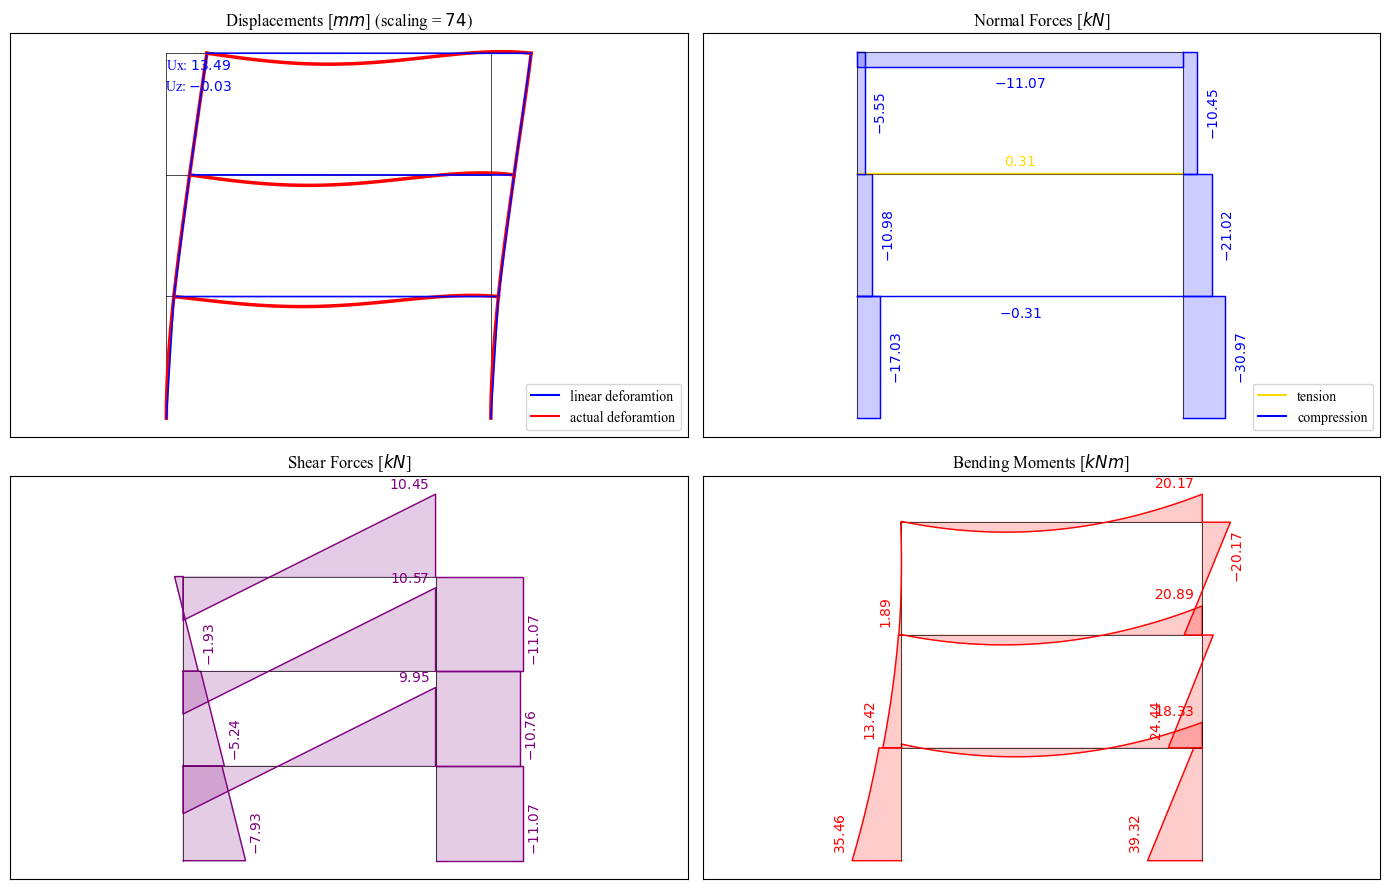

In [7]:
frame.plot_results()